## Capstone Project - Car Accidents Severity Factors
#### Applied Data Science Capstone by IBM/Coursera (Week 2)

### Table of contents
 * [Business Problem](#problem)
 * [Project Data](#data)
 * [Methodology](#methodology)
 * [Analysis](#analysis)
 * [Results](#results)
 * [Discussion](#discussion)
 * [Conclusion](#conclusions)

### Business Problem: <a name="problem"></a>
A lot of effort and funding are invested every year all around the world to decrease car accidents severity outcomes.  Considering every state has limited resources for dealing with the problem, it will make great importance to know where to focus our efforts to get the best results. I will try to answer this question by creating a model for classifying accidents severity and determine which factors effects the most. 

### Project Data: <a name="data"></a>
I'll be using Seattle government collected data of 194,673 collisions between 01/01/2014 to 20/05/2020. 
The independents variables can be divided to three categories:
1.	External Factors- Weather,  light
2.	Drivers state- Under influence 
3.	Collison course- how many vehicles/pedestrians involved, what type of vehicles, where and how the car got hit.
4.	Collison Location- Interchange, mid-block, specific location (prone to accidents).<br>
<br>
The target variable is the Collison severity= property damage or injury



## Methodolgy: <a name="methodology"></a>
The car severity factors will be identified and quantified by using logistic regression model with target variable is high severity = 1 or low severity=0.<br><br>
The logistic regression explanatory variables will be selected using Recursive Feature Elimination (R.F.E) algorithm. RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.<br><br>
Using Synthetic Minority Oversampling Technique (SMOTE) we will try to balance the data set- equalizing the severity category labels. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.<br><br>
After we have our logistic regression set, will use the p-value to point out the significance factors and because the data will be standardized we will use the variables coefficients to determine their importance.



#### Import Libs

In [97]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, cluster

import matplotlib.pyplot as plt
plt.rc("font", size=14)
from matplotlib.pyplot import figure
import statsmodels.api as sm
#conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import scipy


## Analysis: <a name="analysis"></a>

#### Import Data 

In [98]:
accdnts=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',low_memory=False)

#### Target Variable

In [99]:
accdnts['y']=accdnts['SEVERITYCODE']-1
accdnts['y'].value_counts()

0    136485
1     58188
Name: y, dtype: int64

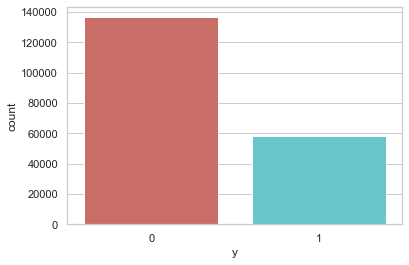

<Figure size 432x288 with 0 Axes>

In [100]:
sns.countplot(x='y',data=accdnts,palette='hls')
plt.show()
plt.savefig('y_plot')

In [101]:
count_0 = len(accdnts[accdnts['y']==0])
count_1 = len(accdnts[accdnts['y']==1])
pct_0 = count_0/(count_0+count_1)
print("percentage of low severity is", pct_0*100)
pct_1 = count_1/(count_0+count_1)
print("percentage of high severity is", pct_1*100)

percentage of low severity is 70.10987656223513
percentage of high severity is 29.890123437764863


In [102]:
accdnts.groupby('y').mean()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
y,,,,,,,,,,,,,,,,
0,1.0,-122.330722,47.618888,107655.87677,139843.28535,140044.814353,37265.439263,1.0,2.329348,0.005268,0.004975,1.943312,13.020552,7.965599e+06,43.643983,1520.236209
1,2.0,-122.330048,47.621058,110410.92782,144019.14967,144240.170155,37950.807038,2.0,2.714357,0.111896,0.083316,1.867928,15.854987,7.989344e+06,798.934041,29162.195556


#### Visualizations

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
C:\Users\Admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


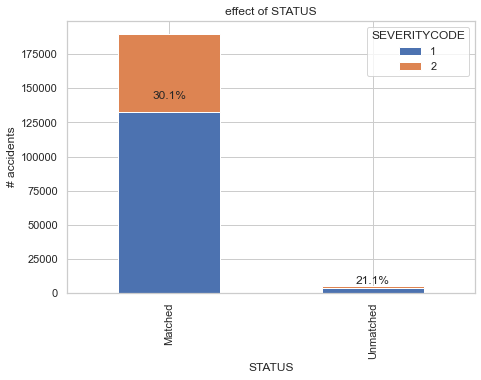

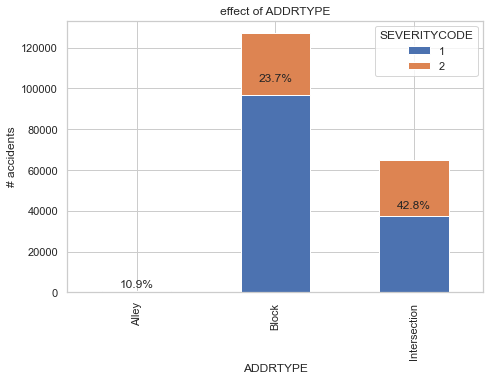

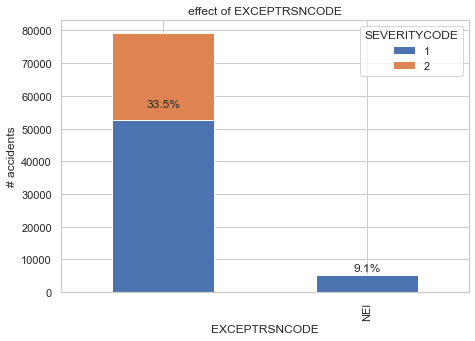

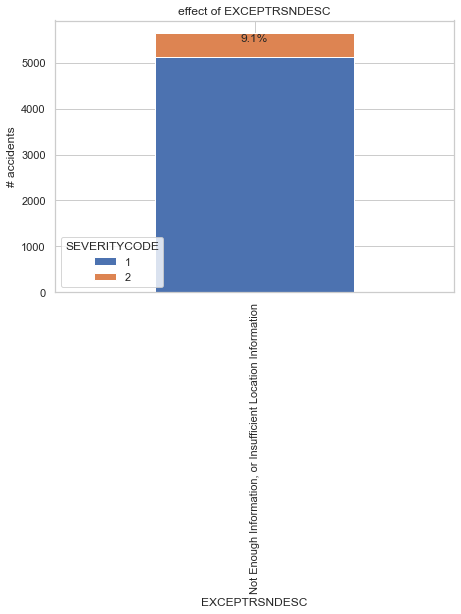

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


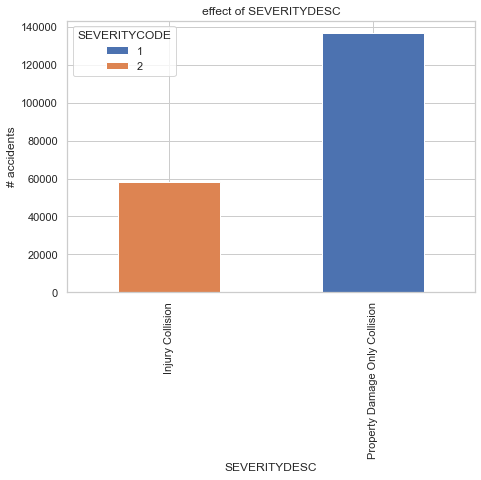

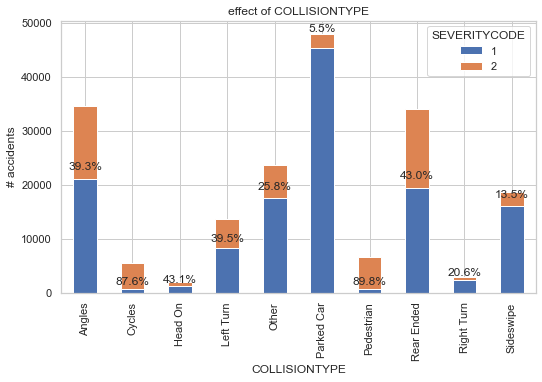

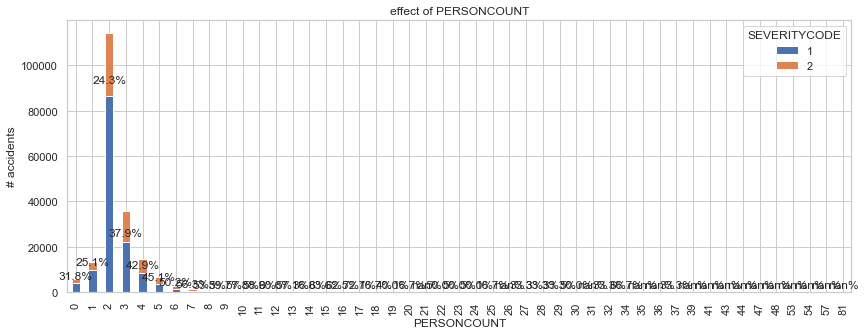

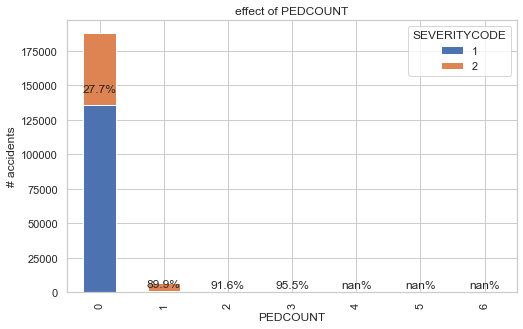

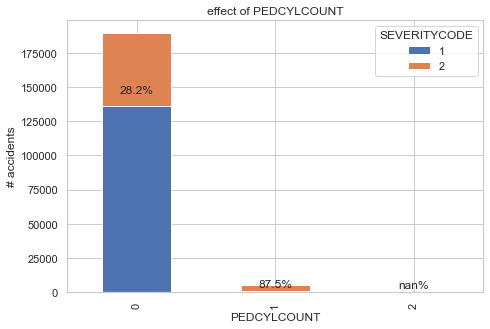

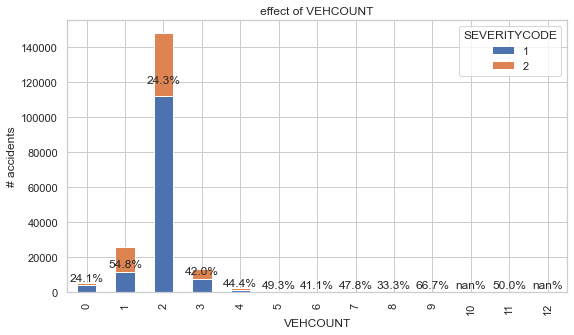

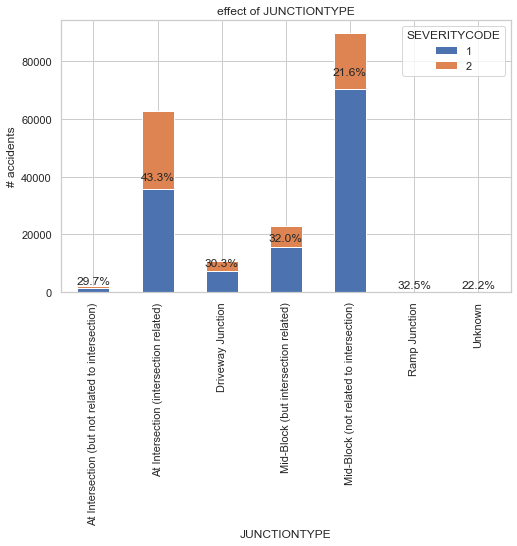

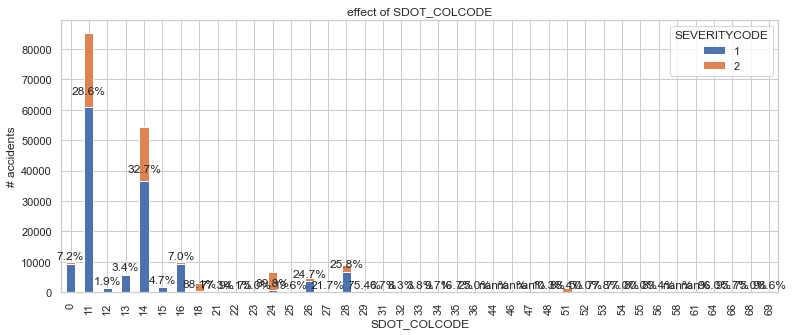

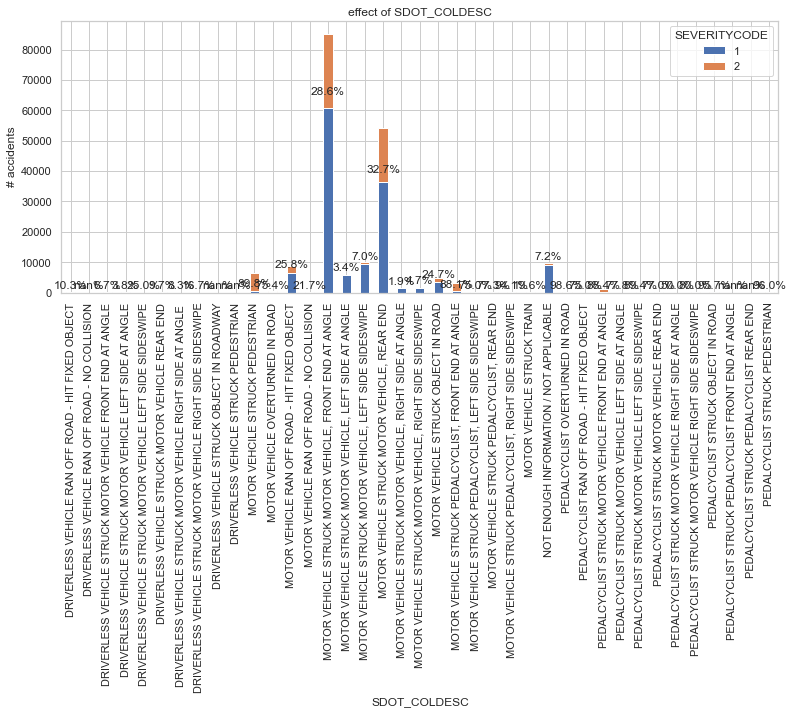

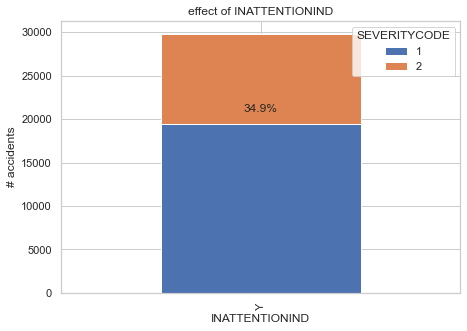

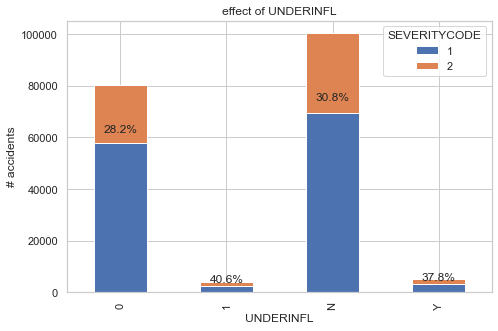

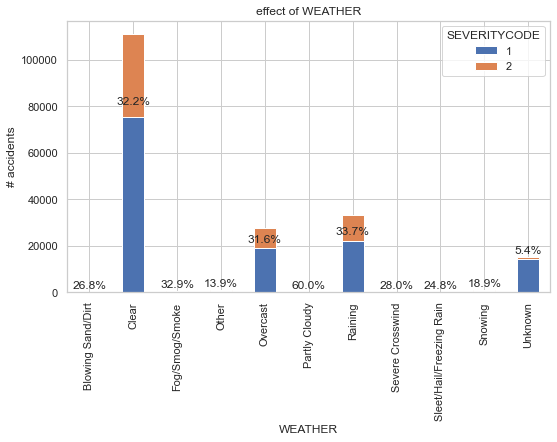

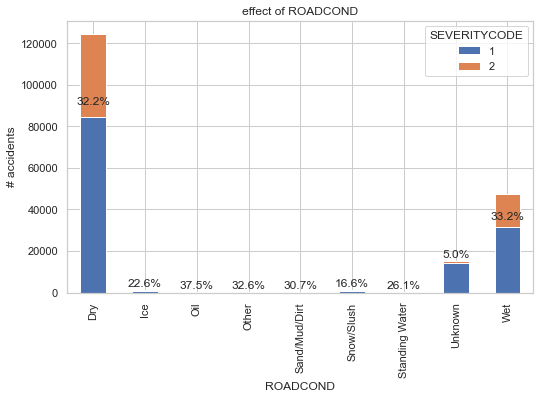

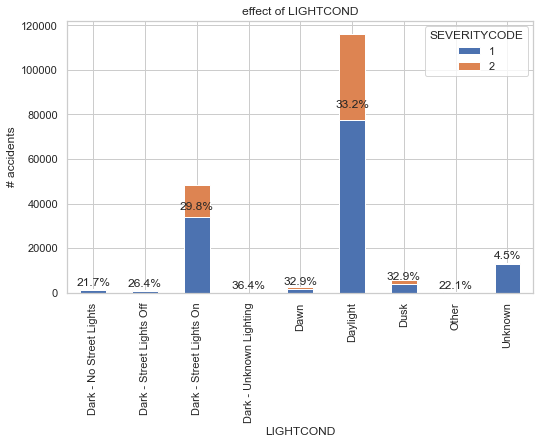

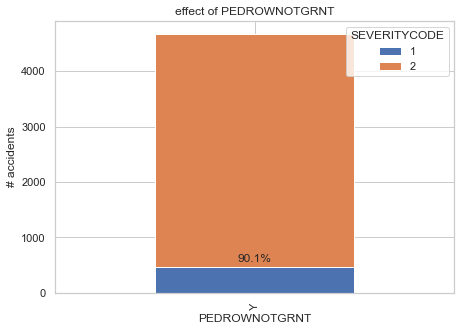

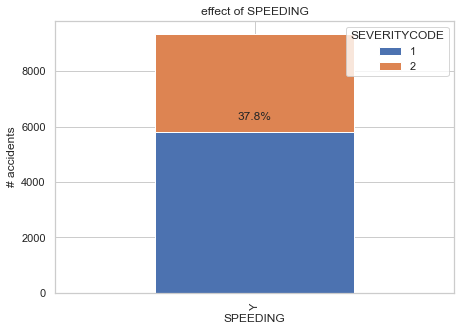

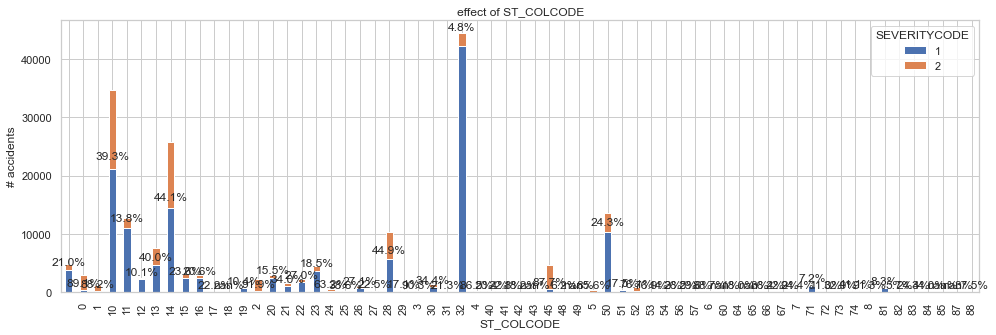

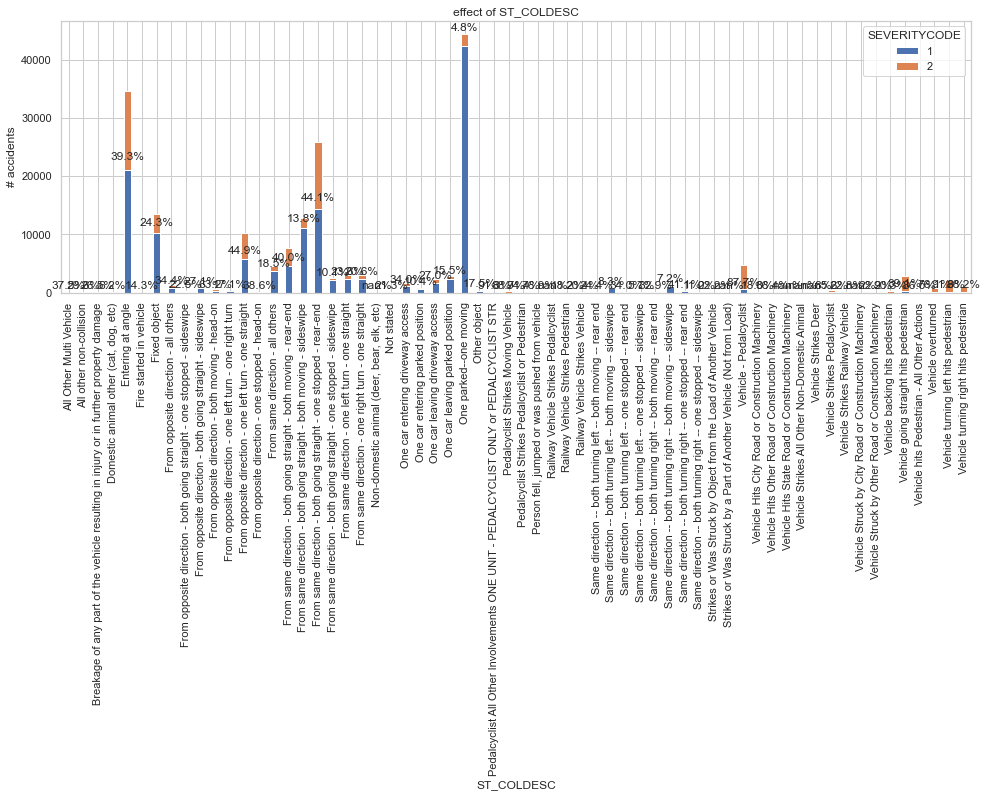

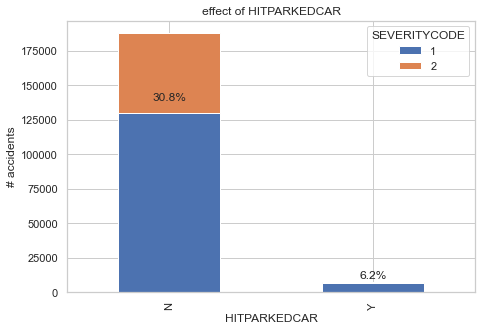

In [103]:
def chart_it(var):
    if accdnts[var].nunique()<=100:        
        temp=pd.DataFrame(accdnts.groupby([var,'SEVERITYCODE']).size()).reset_index()
        temp.rename(columns={0: "cnt"},inplace=True)
        temp2=temp.pivot(index=var,columns='SEVERITYCODE',values='cnt')
        temp2['total']=temp2[1]+temp2[2]
        temp2['1pct']=temp2[1]/temp2['total']
        temp2['2pct']=temp2[2]/temp2['total']
        temp2[1].fillna(0,inplace=True)
        y=temp2[1]/temp2['total'].max()
        x_space=accdnts[var].nunique()
        ax=pd.crosstab(accdnts[var],accdnts['SEVERITYCODE']).plot(kind='bar' ,stacked=True,figsize=(7+0.15*x_space,5))
        #plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')    
        #ax.set_size_inches(18.5, 10.5)
        plt.title('effect of '+var)
        plt.xlabel(var)
        plt.ylabel('# accidents')
        x=0

        for i in temp2.index:
            plt.text(x+1/(2*x_space),y.loc[i]+0.025,"{:.1%}".format(temp2['2pct'].loc[i]),horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
            x=x+1/x_space
        plt.savefig(var.replace('/','_') +'_fig')
    
#columns_to_chart=accdnts.drop(['SEVERITYCODE.1','SEVERITYCODE','SEVERITYDESC','INCKEY','REPORTNO','STATUS','LOCATION','ADDRTYPE','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','HITPARKEDCAR'],axis=1)
for col in accdnts.drop(['SEVERITYCODE.1','SEVERITYCODE','y'],axis=1):
    chart_it(col)

#### Data Handeling

missing data

In [104]:
#there's no use to predict an "unknown" sevirty (0=unknown)
accdnts=accdnts[accdnts['SEVERITYCODE']>0]
#we don't want accidents we can't locate.
accdnts=accdnts[accdnts['X'].notnull()]
accdnts=accdnts[accdnts['LOCATION'].notnull()]
accdnts=accdnts[accdnts['ADDRTYPE'].notnull()]

converting class variables to dummies

In [105]:
#Converting interchange id to an indicator if the accident happend on an interchange
accdnts['INTCHNG_IND'] = accdnts['INTKEY'].apply(lambda x:1 if x >0 else 0)
accdnts.drop(['INTKEY'],axis=1,inplace=True)
#converting class variable to dummy ind variables and adding a indicator column for missing values
accdnts = pd.get_dummies(accdnts, columns=['COLLISIONTYPE'],prefix='collis')
accdnts = pd.get_dummies(accdnts, columns=['JUNCTIONTYPE'],prefix='junc')
accdnts = pd.get_dummies(accdnts, columns=['WEATHER'],prefix='wthr',dummy_na=True)
accdnts = pd.get_dummies(accdnts, columns=['ROADCOND'],prefix='road',dummy_na=True)
#fixing underinfl variable (had both '1' and 'Y' and '0' and 'N') and replacing null variable with -1 
accdnts['UNDERINFL_fix'] = accdnts['UNDERINFL'].apply(lambda x:1 if (x =='Y' or x=='1') else(0 if (x=='N' or x=='0') else -1))
accdnts.drop(['UNDERINFL'],axis=1,inplace=True)
#converting varibles to binaric
accdnts['PEDROWNOTGRNT_fix']=accdnts['PEDROWNOTGRNT'].apply(lambda x:1 if x=='Y' else 0)
accdnts['SPEEDING_fix']=accdnts['SPEEDING'].apply(lambda x:1 if x=='Y' else 0)
accdnts['HITPARKEDCAR_fix']=accdnts['HITPARKEDCAR'].apply(lambda x:1 if x=='Y' else 0)
accdnts['ADDRTYPE_fix']=accdnts['ADDRTYPE'].apply(lambda x:1 if x=='Intersection' else 0)
accdnts['INATTENTIONIND_fix']=accdnts['INATTENTIONIND'].apply(lambda x:1 if x=='Y' else 0)
accdnts['EXCEPTRSNCODE_fix']=accdnts['EXCEPTRSNCODE'].apply(lambda x:1 if x=='NEI' else 0)


In [106]:
#breaking down the accident description to who struck who and where
accdnts['driverless_struck']= accdnts['SDOT_COLDESC'].str.split(expand=True)[0].apply(lambda x:1 if x=="DRIVERLESS" else 0)
accdnts['motor_struck']= accdnts['SDOT_COLDESC'].str.split(expand=True)[0].apply(lambda x:1 if x=="MOTOR" else 0)
accdnts['pedalcyclist_struck']= accdnts['SDOT_COLDESC'].str.split(expand=True)[0].apply(lambda x:1 if x=="PEDALCYCLIST" else 0)
accdnts['idk_struck']= accdnts['SDOT_COLDESC'].str.split(expand=True)[0].apply(lambda x:1 if x=="NOT" else 0)
accdnts['struck_motor']= accdnts['SDOT_COLDESC'].str.split(expand=True)[3].apply(lambda x:1 if x=="MOTOR" else (1 if x=='VEHICLE' else 0))
accdnts['struck_pedalcyclist']= accdnts['SDOT_COLDESC'].str.split(expand=True)[2].apply(lambda x:1 if x=="PEDALCYCLIST" else 0)+accdnts['SDOT_COLDESC'].str.split(expand=True)[3].apply(lambda x:1 if x=="PEDALCYCLIST" else 0)
accdnts['struck_pedestrain']= accdnts['SDOT_COLDESC'].str.split(expand=True)[2].apply(lambda x:1 if x=="PEDESTRAIN" else 0)+accdnts['SDOT_COLDESC'].str.split(expand=True)[3].apply(lambda x:1 if x=="PEDESTRAIN" else 0)
accdnts['struck_train']= accdnts['SDOT_COLDESC'].str.split(expand=True)[3].apply(lambda x:1 if x=="TRAIN" else 0)
accdnts['struck_self']=1-accdnts['struck_motor']-accdnts['struck_pedalcyclist']-accdnts['struck_pedestrain']-accdnts['struck_train']-accdnts['idk_struck']
accdnts['front_hit']=accdnts['SDOT_COLDESC'].apply(lambda x:1 if 'FRONT' in x else 0)
accdnts['rear_hit']=accdnts['SDOT_COLDESC'].apply(lambda x:1 if 'REAR' in x else 0)
accdnts['left_hit']=accdnts['SDOT_COLDESC'].apply(lambda x:1 if 'LEFT' in x else 0)
accdnts['right_hit']=accdnts['SDOT_COLDESC'].apply(lambda x:1 if 'RIGHT' in x else 0)
accdnts['hit_by_angle']=accdnts['SDOT_COLDESC'].apply(lambda x:1 if 'ANGLE' in x else 0)
accdnts['hit_by_sideswipe']=accdnts['SDOT_COLDESC'].apply(lambda x:1 if 'SIDESWIPE' in x else 0)

In [107]:
#breaking down lightining condition
accdnts['dark_ind']=accdnts['LIGHTCOND'].fillna('Unknown').apply(lambda x:1 if 'Dark' in x else 0)
accdnts['daylight_ind']=accdnts['LIGHTCOND'].fillna('Unknown').apply(lambda x:1 if 'Daylight' in x else 0)
accdnts['other_light_ind']=1-accdnts['dark_ind']-accdnts['daylight_ind']
accdnts = pd.get_dummies(accdnts, columns=['LIGHTCOND'],prefix='light')

In [108]:
#hour and day of week variables
accdnts['day_of_week']=pd.to_datetime(accdnts['INCDATE']).dt.dayofweek
accdnts['hour']=pd.to_datetime(accdnts['INCDTTM']).dt.hour

In [109]:
#droping unusable variables
accdnts.drop(['PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM','INCDATE'],axis=1,inplace=True)
accdnts.drop(['HITPARKEDCAR','INATTENTIONIND','EXCEPTRSNCODE'],axis=1,inplace=True)
accdnts.drop(['EXCEPTRSNDESC'],axis=1,inplace=True)

Visualizations: Fixed Data

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


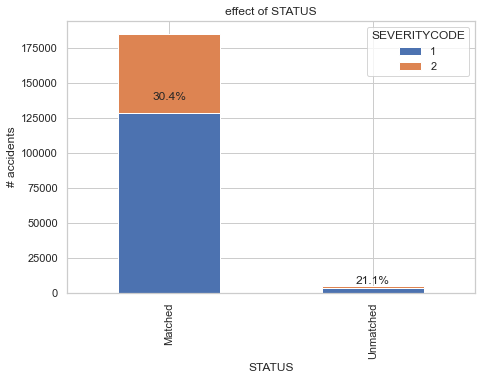

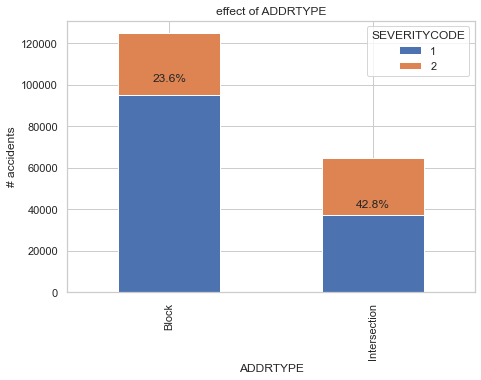

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


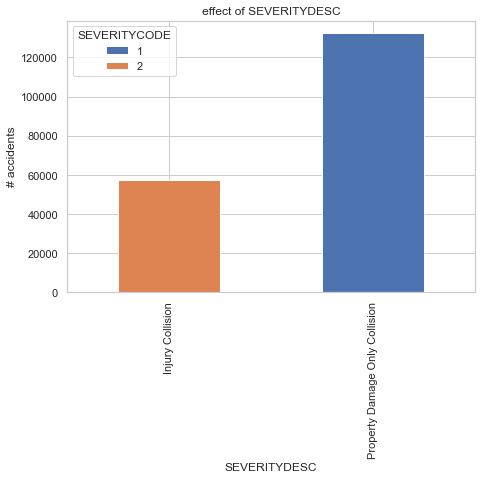

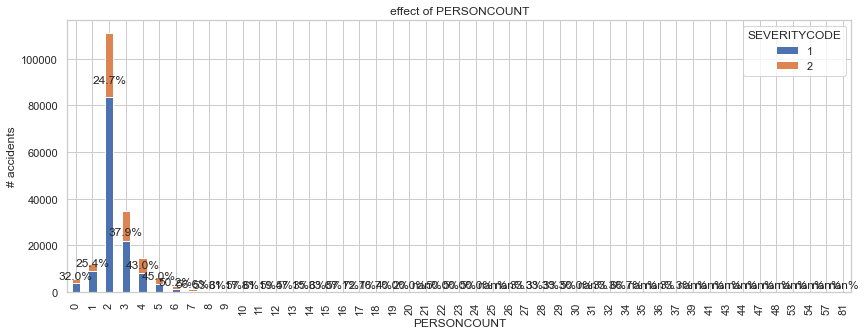

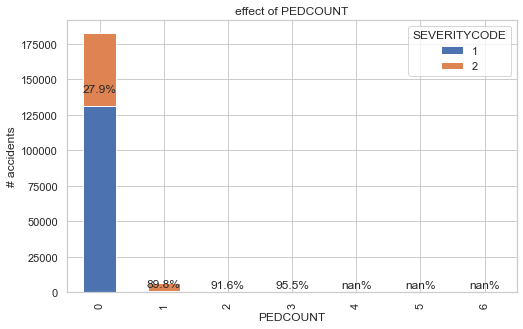

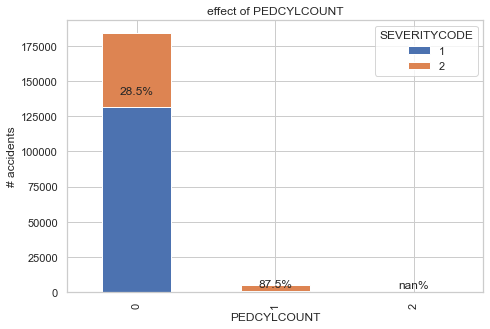

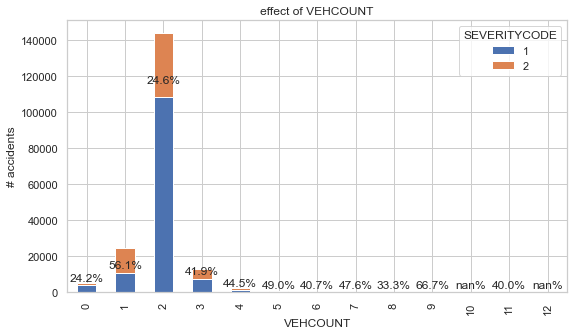

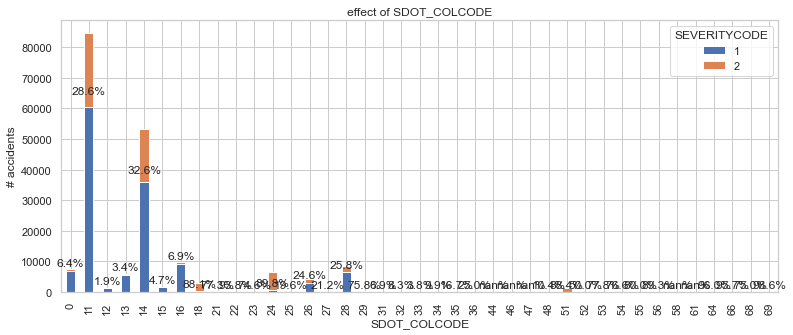

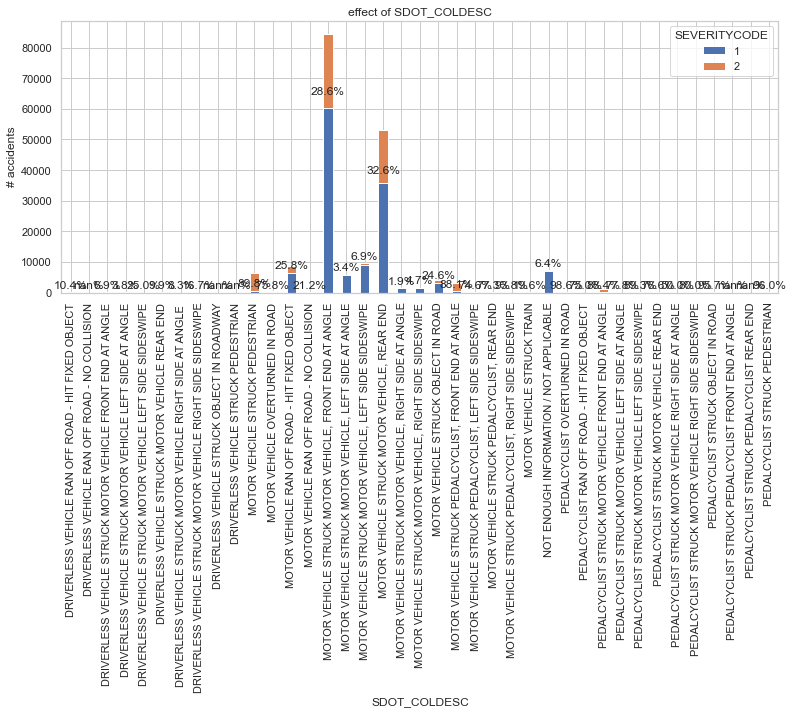

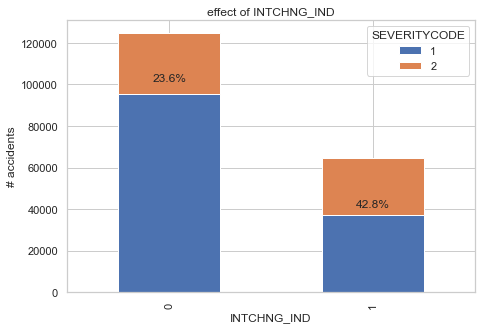

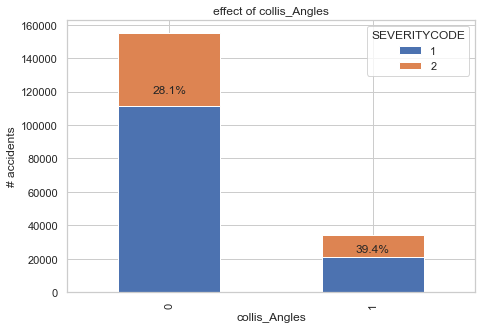

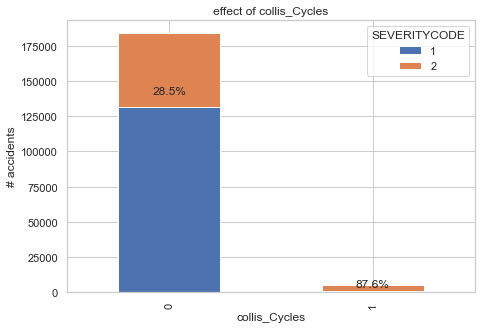

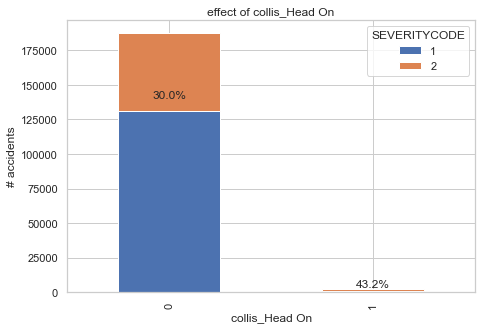

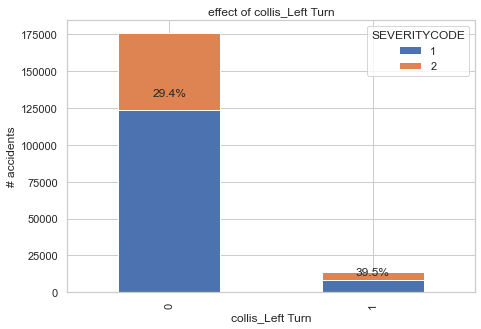

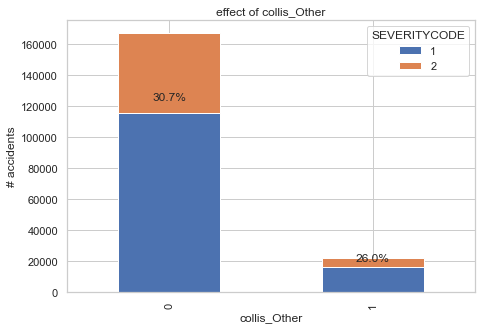

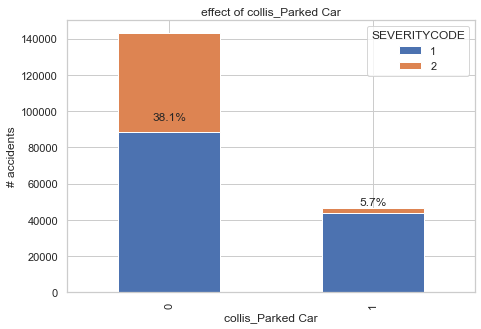

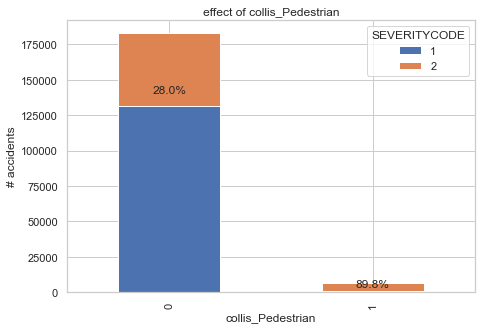

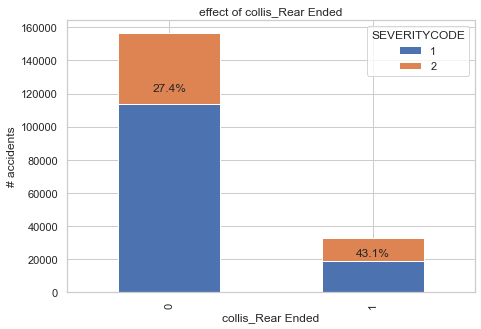

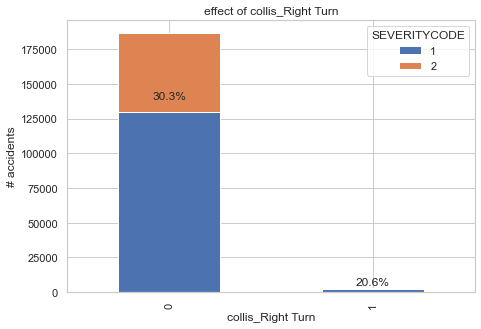

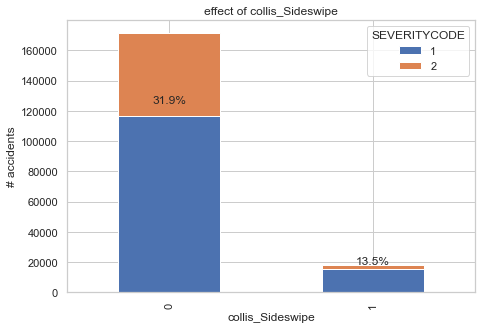

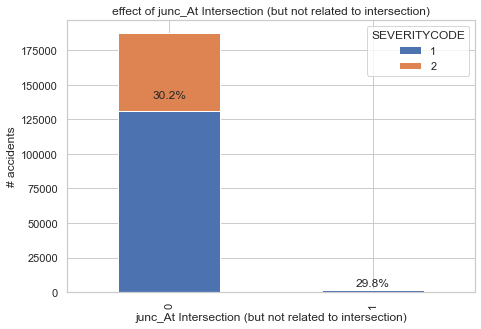

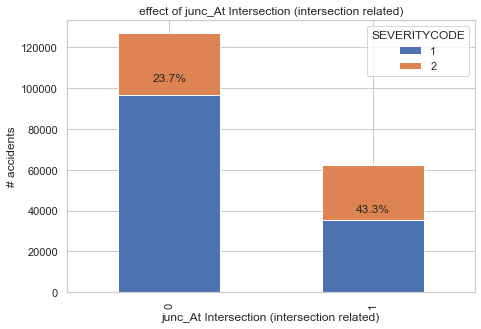

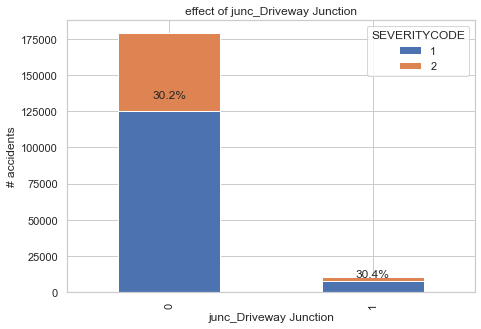

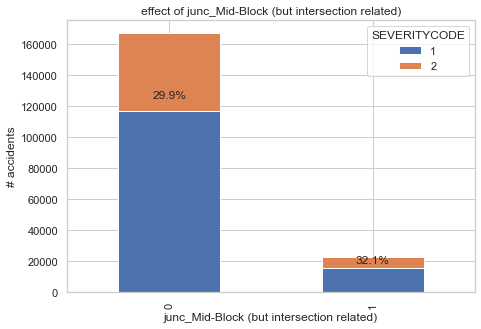

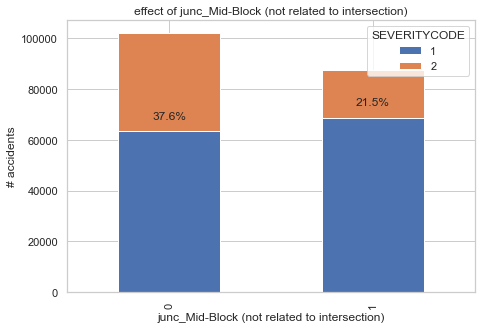

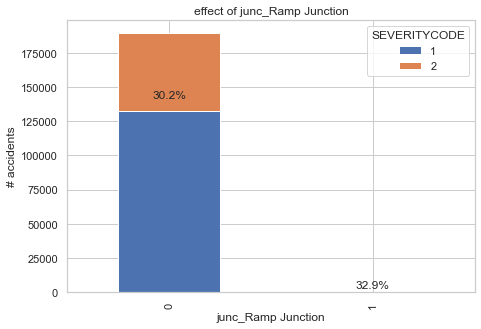

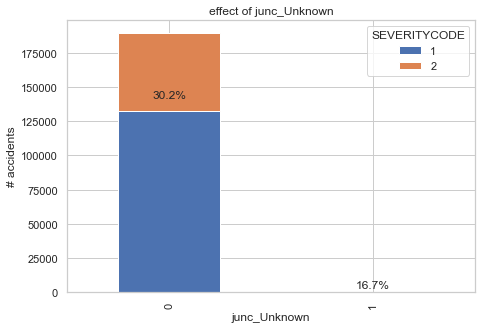

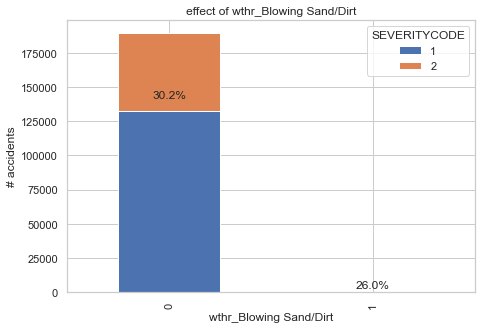

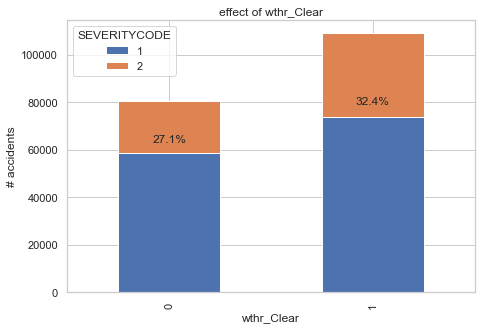

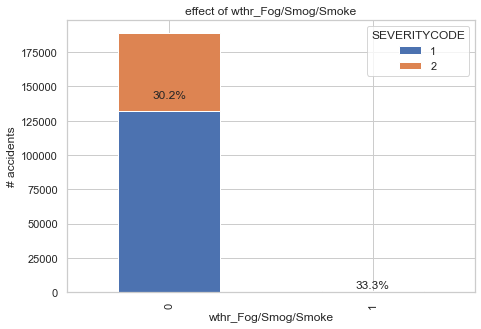

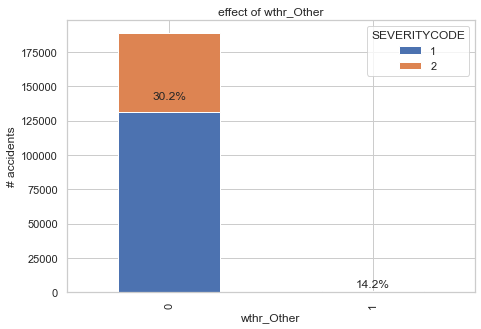

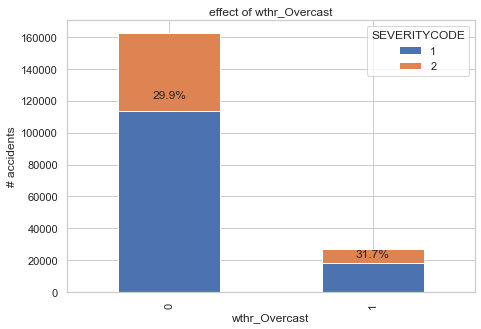

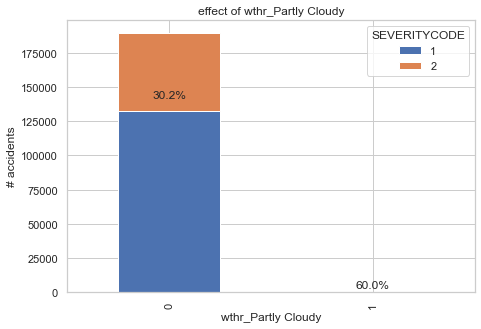

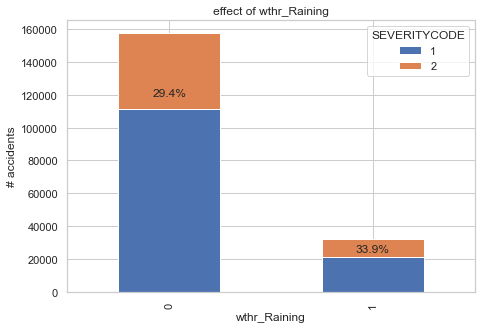

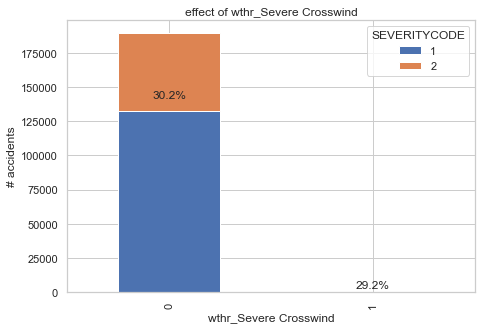

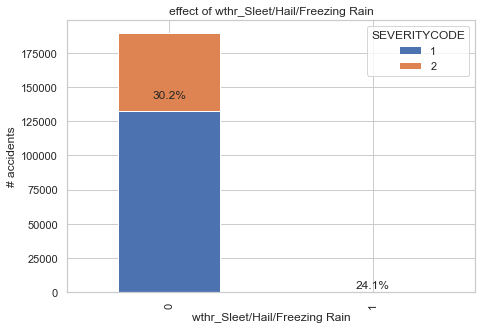

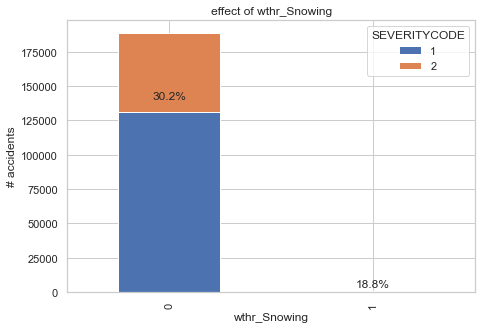

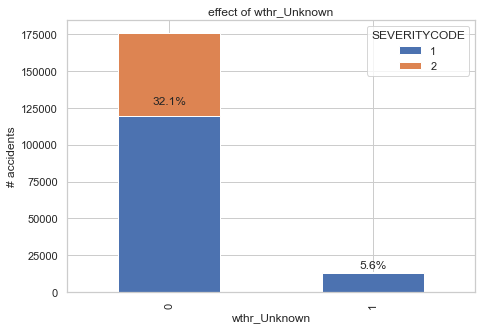

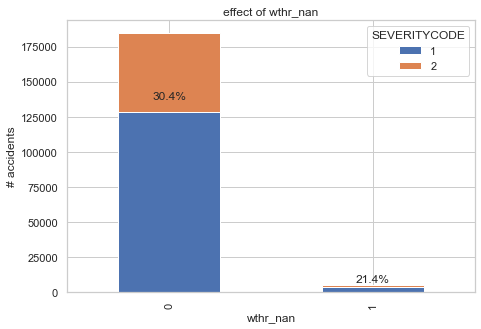

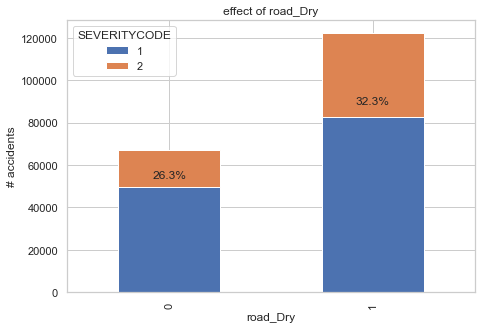

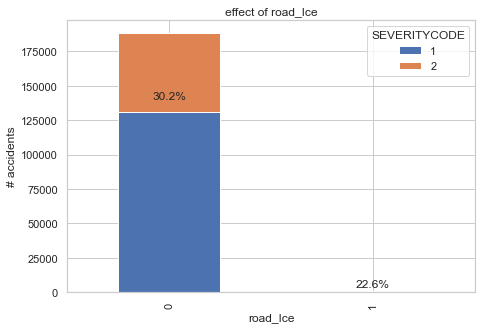

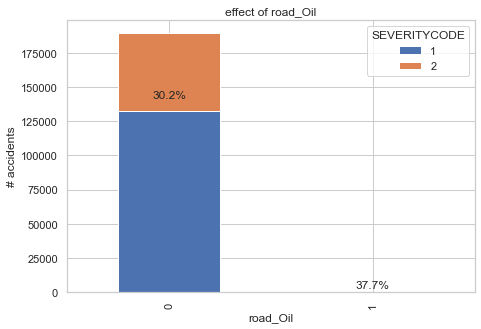

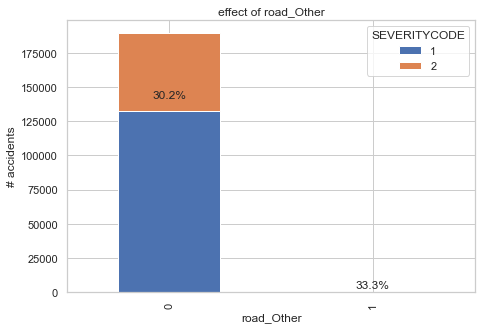

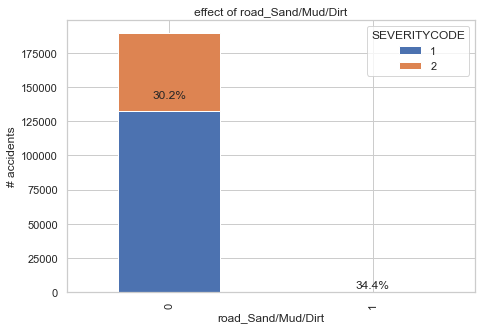

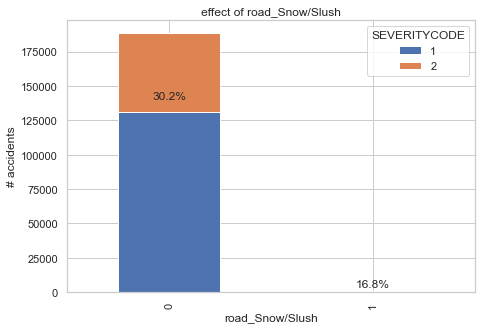

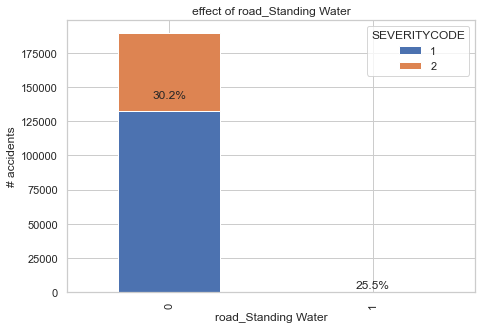

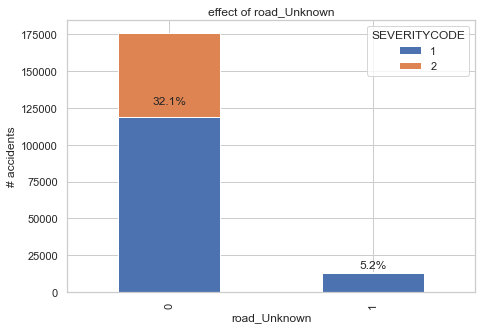

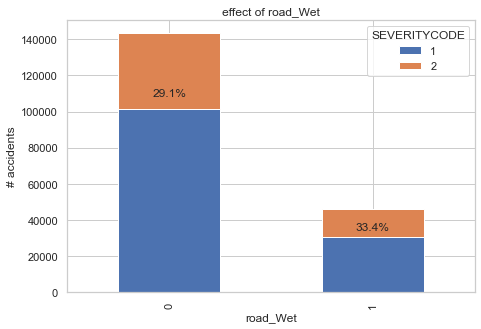

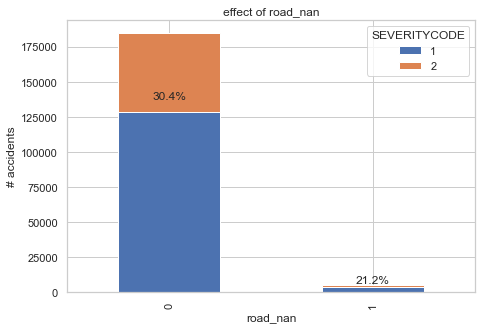

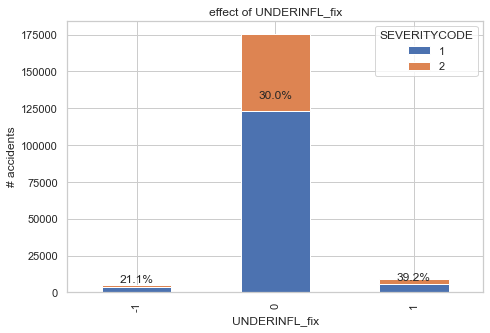

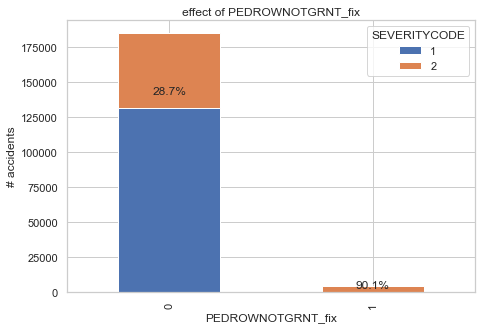

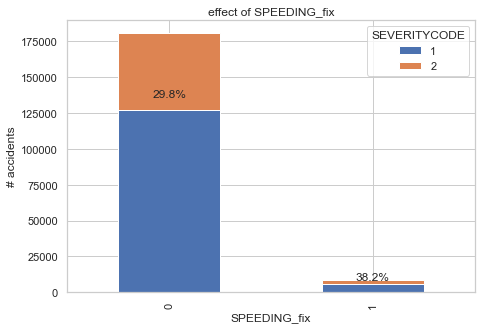

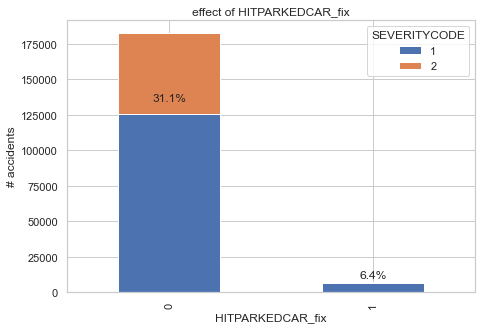

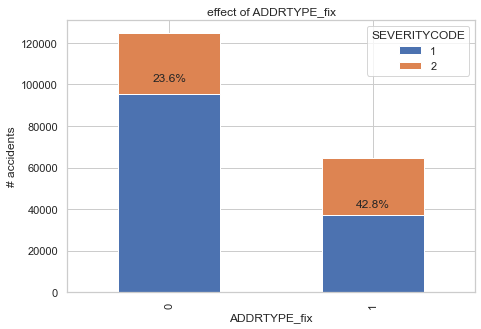

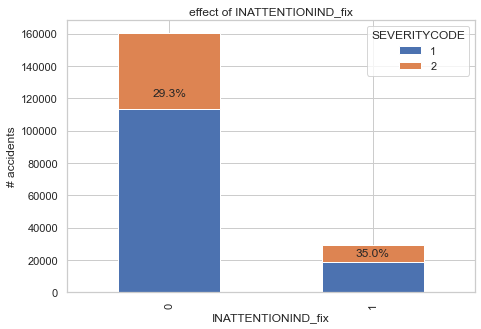

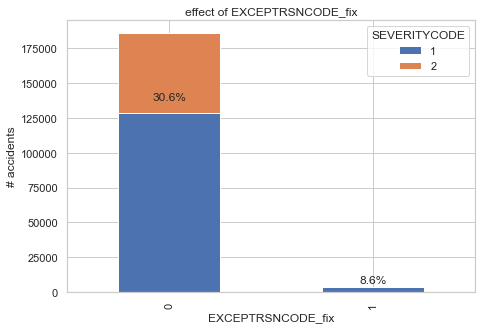

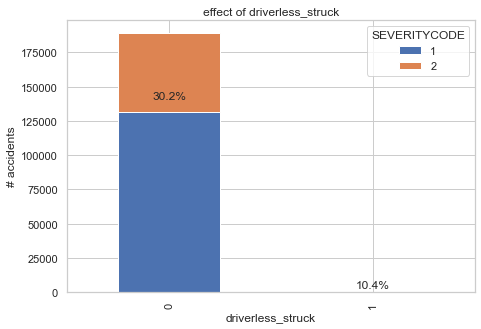

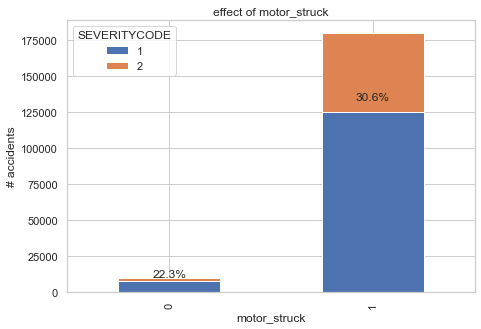

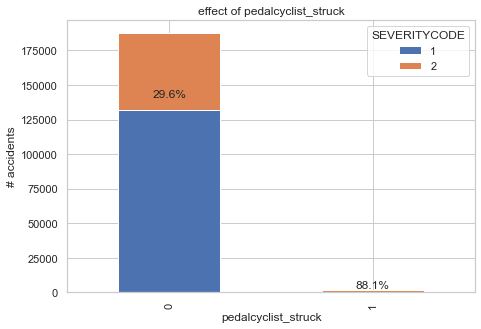

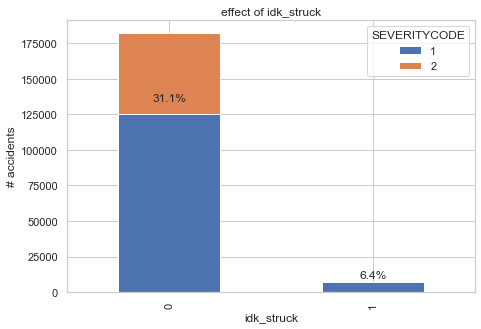

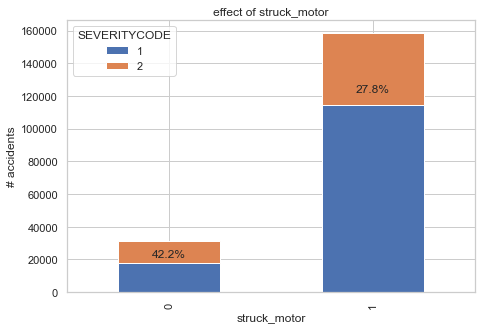

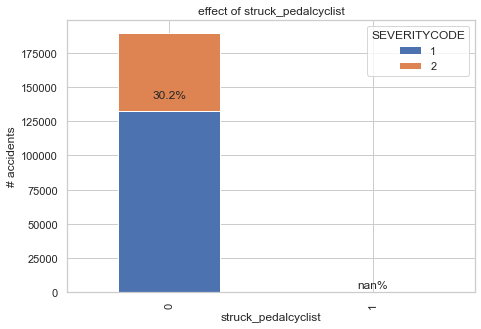

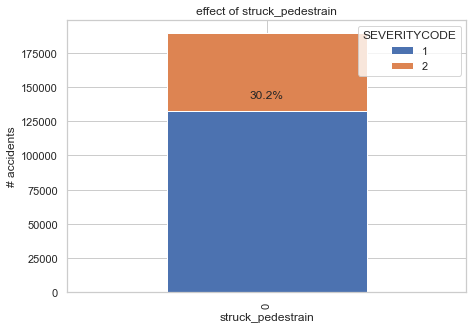

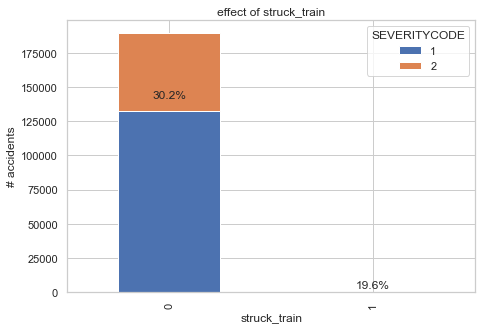

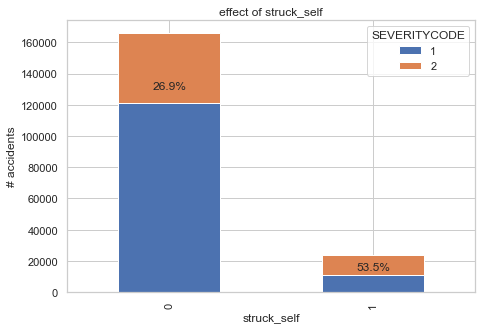

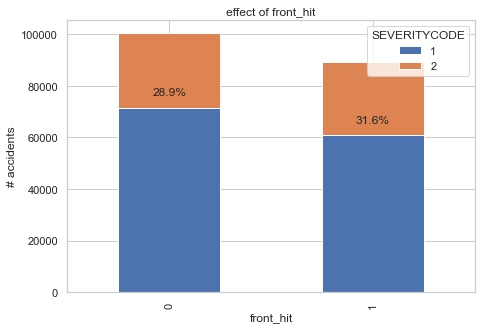

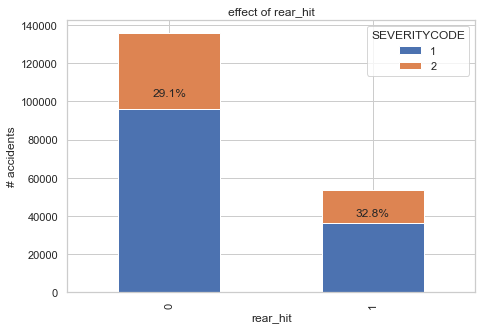

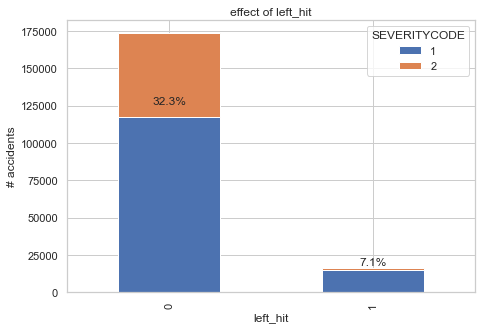

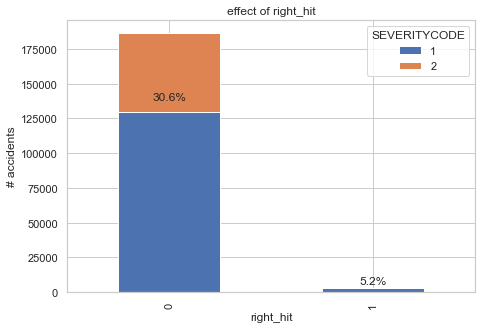

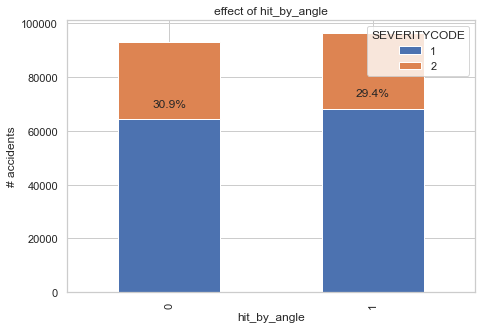

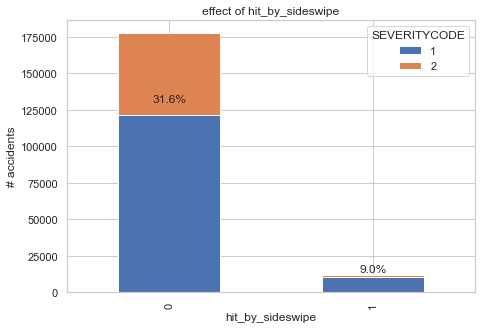

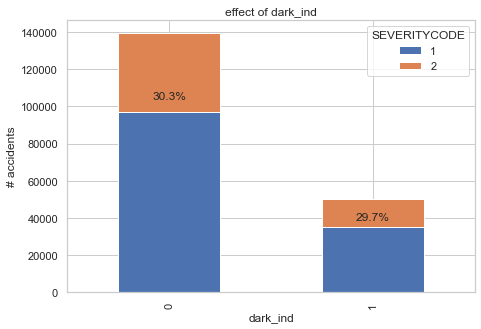

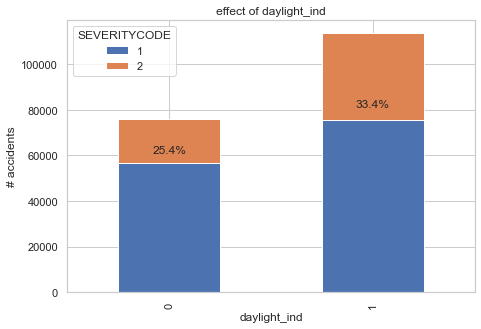

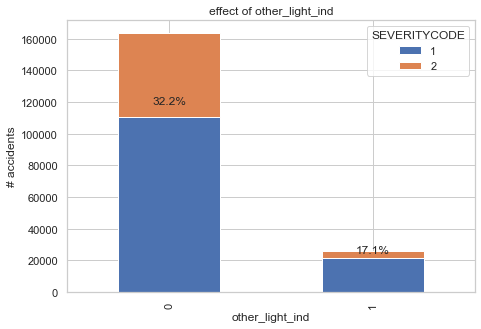

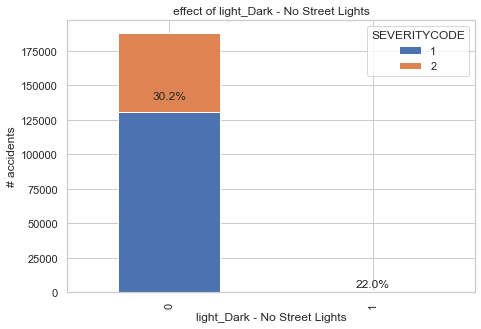

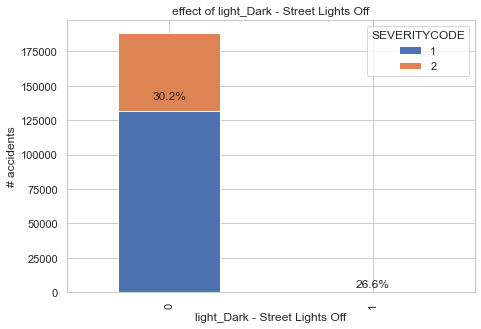

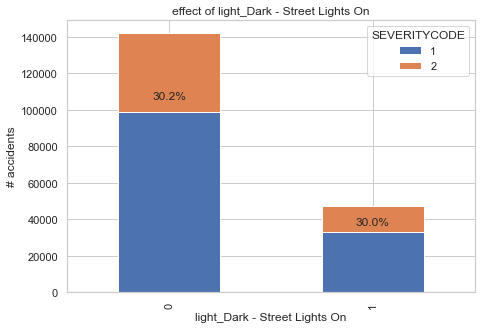

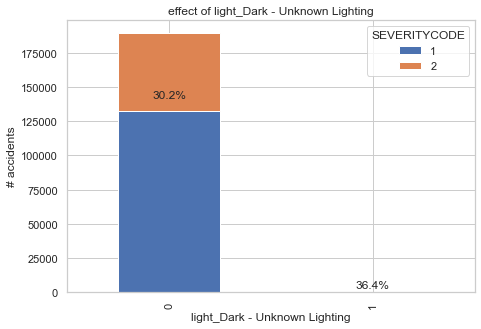

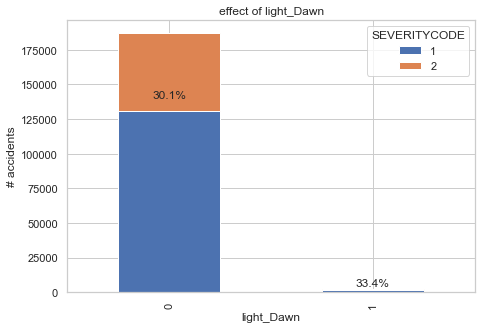

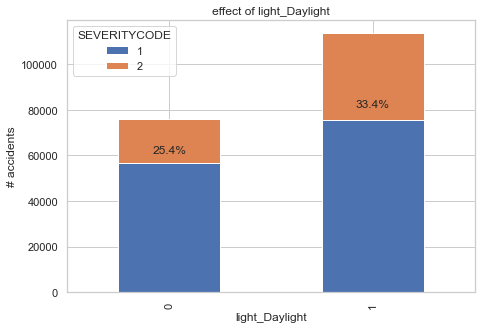

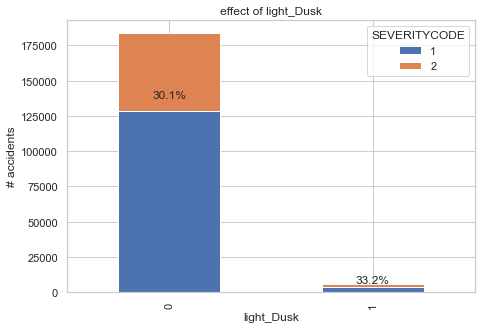

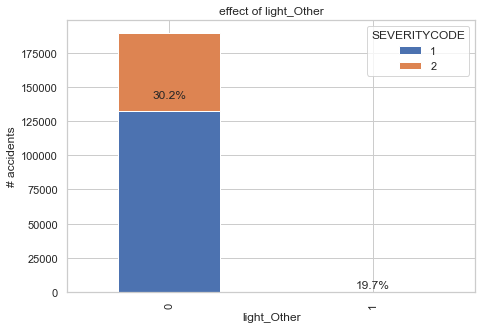

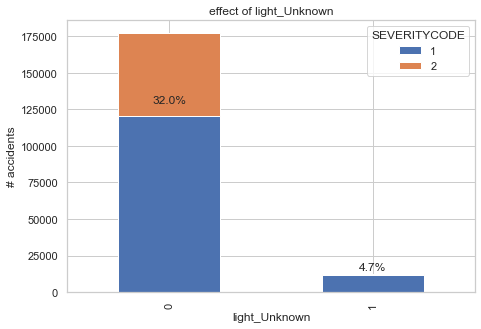

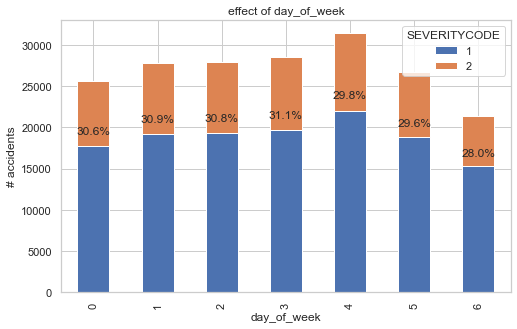

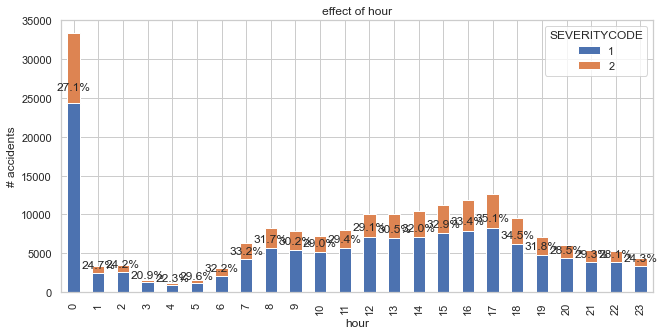

In [110]:
for col in accdnts.drop(['SEVERITYCODE.1','SEVERITYCODE','y',],axis=1):
    chart_it(col)

#### grouping variables

Let's figure from the graphs, how to make beffer features from the multi intervals variables:
* PERSONCOUNT: 1-2 persons get the lowest severity rate. 3 and above are the highest and 0 is mid-ranged
* PEDCOUNT: 0 get the lowest severity and above it, the highest
* PEDCYLCOUNT: 0-low/1-high
* VEHCOUNT: 0 and 2 get the lowest severity rate. 1 is among the highest. every thing else in the middle.
* day_of_week: doesn't seems relevant- it will probably won't make the cut
* hour: between 23:00 to 4:00 the severity is the lowest and between 17:00-18:00 is the highest so will break it down to indicators

In [111]:
accdnts['PERSONCOUNT groups']=accdnts['PERSONCOUNT'].fillna(4).apply(lambda x:1 if 1<=x<=2 else (3 if x>2 else 2))
accdnts['PEDCOUNT groups']=accdnts['PEDCOUNT'].fillna(1).apply(lambda x:1 if x==0 else 1)
accdnts['PEDCYLCOUNT groups']=accdnts['PEDCYLCOUNT'].fillna(1).apply(lambda x:1 if x==0 else 1)
accdnts['VEHCOUNT groups']=accdnts['VEHCOUNT'].fillna(3).apply(lambda x:1 if x==0 else (1 if x==2 else (3 if x==1 else 2)))
accdnts['hour groups']=accdnts['hour'].fillna(0).apply(lambda x:1 if 0<=x<=4 else (1 if x==23 else (3 if 17<=x<=18 else 2)))

#### Adding Geospatial Clusters <br>
We'll divde accidents coordinets to cluster using k-means <br>
first will find the best k using elbow method

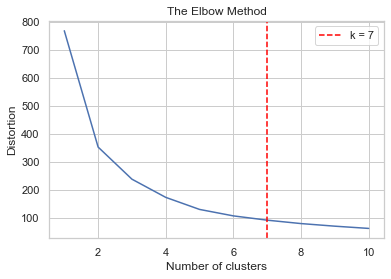

In [112]:
X = accdnts[["X","Y"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)

So we need 7 clusters. Let's add them to the data

In [113]:
k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = accdnts[["X","Y"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
accdnts[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Here the clusters on map:

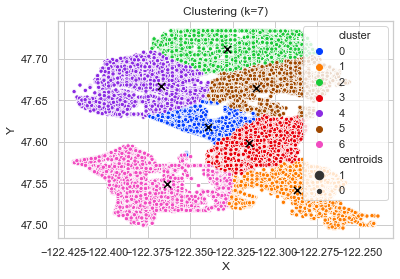

In [114]:
fig, ax = plt.subplots()
sns.scatterplot(x="X", y="Y", data=accdnts, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

Let's see which clusters have the highest accedents severity rate

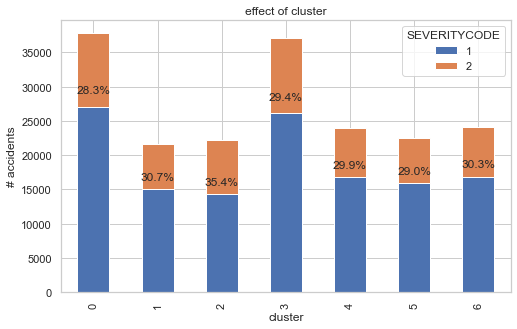

In [115]:
chart_it('cluster')

So most of the accdents are in cluster 0 but it's also with lowest severity rate.<br>
cluster 2 is the only one who stands out with high severity rate.

In [116]:
accdnts = pd.get_dummies(accdnts, columns=['cluster'],prefix='cluster',dummy_na=True)

#### Final Data

In [117]:
final_data=accdnts.drop(['SEVERITYCODE.1','SEVERITYCODE','SEVERITYDESC','INCKEY','REPORTNO','STATUS','LOCATION','ADDRTYPE','SDOT_COLCODE','SDOT_COLDESC','X','Y','OBJECTID','COLDETKEY'],axis=1)

In [136]:
X = final_data.loc[:, final_data.columns != 'y']
y = final_data.loc[:, final_data.columns == 'y']

#### Scaling Data

In [137]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns,index=X.index)
X_scaled.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INTCHNG_IND,collis_Angles,collis_Cycles,collis_Head On,collis_Left Turn,collis_Other,collis_Parked Car,collis_Pedestrian,collis_Rear Ended,collis_Right Turn,collis_Sideswipe,junc_At Intersection (but not related to intersection),junc_At Intersection (intersection related),junc_Driveway Junction,junc_Mid-Block (but intersection related),junc_Mid-Block (not related to intersection),junc_Ramp Junction,junc_Unknown,wthr_Blowing Sand/Dirt,wthr_Clear,wthr_Fog/Smog/Smoke,wthr_Other,wthr_Overcast,wthr_Partly Cloudy,wthr_Raining,wthr_Severe Crosswind,wthr_Sleet/Hail/Freezing Rain,wthr_Snowing,wthr_Unknown,wthr_nan,road_Dry,road_Ice,road_Oil,road_Other,road_Sand/Mud/Dirt,road_Snow/Slush,road_Standing Water,road_Unknown,road_Wet,road_nan,UNDERINFL_fix,PEDROWNOTGRNT_fix,SPEEDING_fix,HITPARKEDCAR_fix,ADDRTYPE_fix,INATTENTIONIND_fix,EXCEPTRSNCODE_fix,driverless_struck,motor_struck,pedalcyclist_struck,idk_struck,struck_motor,struck_pedalcyclist,struck_pedestrain,struck_train,struck_self,front_hit,rear_hit,left_hit,right_hit,hit_by_angle,hit_by_sideswipe,dark_ind,daylight_ind,other_light_ind,light_Dark - No Street Lights,light_Dark - Street Lights Off,light_Dark - Street Lights On,light_Dark - Unknown Lighting,light_Dawn,light_Daylight,light_Dusk,light_Other,light_Unknown,day_of_week,hour,PERSONCOUNT groups,PEDCOUNT groups,PEDCYLCOUNT groups,VEHCOUNT groups,hour groups,centroids,cluster_0.0,cluster_1.0,cluster_2.0,cluster_3.0,cluster_4.0,cluster_5.0,cluster_6.0,cluster_nan
0,-0.335772,-0.189267,-0.171427,0.120430,1.387171,2.120014,-0.170981,-0.103246,-0.27845,-0.365165,-0.569595,-0.189313,-0.459164,-0.12498,-0.324460,-0.105162,1.424732,-0.243281,-0.366909,-0.925847,-0.027492,-0.005629,-0.016253,-1.16428,-0.054122,-0.064026,2.444874,-0.005139,-0.451107,-0.011259,-0.024329,-0.068877,-0.281401,-0.16342,-1.347184,-0.07909,-0.016733,-0.024866,-0.018388,-0.072463,-0.023217,-0.280811,1.763617,-0.162275,-0.081883,-0.158587,-0.219724,-0.196006,1.387171,-0.426807,-0.140905,-0.045198,0.231754,-0.099713,-0.20169,0.442985,-0.007961,0.0,-0.023217,-0.376847,1.061332,-0.628628,-0.303049,-0.129122,0.982725,-0.257259,-0.598444,0.816689,-0.397449,-0.087879,-0.07824,-0.577182,-0.007622,-0.113832,0.816689,-0.177371,-0.031526,-0.265093,-0.488400,0.398519,-0.721596,0.0,0.0,-0.492794,0.225688,-0.00608,-0.499366,-0.359494,2.739113,-0.493473,-0.380257,-0.366928,-0.382329,0.0
1,-0.335772,-0.189267,-0.171427,0.120430,-0.720891,-0.471695,-0.170981,-0.103246,-0.27845,-0.365165,-0.569595,-0.189313,-0.459164,-0.12498,3.082045,-0.105162,-0.701887,-0.243281,-0.366909,1.080092,-0.027492,-0.005629,-0.016253,-1.16428,-0.054122,-0.064026,-0.409019,-0.005139,2.216771,-0.011259,-0.024329,-0.068877,-0.281401,-0.16342,-1.347184,-0.07909,-0.016733,-0.024866,-0.018388,-0.072463,-0.023217,-0.280811,1.763617,-0.162275,-0.081883,-0.158587,-0.219724,-0.196006,-0.720891,-0.426807,-0.140905,-0.045198,0.231754,-0.099713,-0.20169,0.442985,-0.007961,0.0,-0.023217,-0.376847,-0.942213,-0.628628,3.299799,-0.129122,-1.017578,3.887138,1.671000,-1.224457,-0.397449,-0.087879,-0.07824,1.732557,-0.007622,-0.113832,-1.224457,-0.177371,-0.031526,-0.265093,-0.488400,0.964336,-0.721596,0.0,0.0,-0.492794,1.917894,-0.00608,-0.499366,-0.359494,-0.365082,-0.493473,2.629799,-0.366928,-0.382329,0.0
2,1.146711,-0.189267,-0.171427,1.707884,-0.720891,-0.471695,-0.170981,-0.103246,-0.27845,-0.365165,1.755635,-0.189313,-0.459164,-0.12498,-0.324460,-0.105162,-0.701887,-0.243281,-0.366909,1.080092,-0.027492,-0.005629,-0.016253,-1.16428,-0.054122,-0.064026,2.444874,-0.005139,-0.451107,-0.011259,-0.024329,-0.068877,-0.281401,-0.16342,0.742289,-0.07909,-0.016733,-0.024866,-0.018388,-0.072463,-0.023217,-0.280811,-0.567016,-0.162275,-0.081883,-0.158587,-0.219724,-0.196006,-0.720891,-0.426807,-0.140905,-0.045198,0.231754,-0.099713,-0.20169,0.442985,-0.007961,0.0,-0.023217,-0.376847,-0.942213,1.590765,-0.303049,-0.129122,-1.017578,-0.257259,-0.598444,0.816689,-0.397449,-0.087879,-0.07

#### Balancing the data set using Synthetic Minority Oversampling Technique (SMOTE)

In [138]:
#X = final_data.loc[:, final_data.columns != 'y']
#y = final_data.loc[:, final_data.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  185258
Number of no subscription in oversampled data 92629
Number of subscription 92629
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


#### Recursive Feature Elimination (RFE) on balanced data

In [139]:
#data_final_vars=final_data.columns.values.tolist()
#y=['y']
#X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1,max_iter=200)
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[ True  True  True  True  True  True  True False  True  True  True  True
 False  True  True False  True  True  True  True False False False False
 False False False False False False False False  True False  True False
 False False False  True False  True False False  True False  True False
  True False False  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True False False False False  True
 False False False False False  True False False  True False False  True
 False  True  True False  True False  True False  True False]
[ 1  1  1  1  1  1  1  7  1  1  1  1  6  1  1 27  1  1  1  1 14 43 21 37
 34 28  4 33 22 31 15 29  1 41  1 36 25 18 19  1 32  1 17 13  1 12  1 23
  1 24  5  1  1  1  1  1  1 47 38  1  1  1  1  1  1  1  1  9 20 26 40  1
 44 11 10  8 42  1  3 35  1 45 46  1 39  1  1  2  1 30  1 16  1 48]


In [140]:
cols=pd.DataFrame(X.columns).rename(columns={0:'col_name'})
chosen_variables=[]

for i in range(X.shape[1]):
    if rfe.support_[i]:
        chosen_variables.append( cols.iloc[i][0])
#chosen_variables

#### Implementing the model

In [141]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train.values.ravel(),X_train[['PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INTCHNG_IND',
 'collis_Angles',
 'collis_Cycles',
 'collis_Left Turn',
 'collis_Other',
 'collis_Parked Car',
 #'collis_Pedestrian',
 'collis_Right Turn',
 'collis_Sideswipe',
 'junc_At Intersection (intersection related)',
 'junc_Driveway Junction',
 'junc_Mid-Block (but intersection related)',
 'junc_Mid-Block (not related to intersection)',
 'wthr_Unknown',
 'road_Dry',
 'road_Snow/Slush',
 'road_Unknown',
 'road_nan',
 'UNDERINFL_fix',
 'SPEEDING_fix',
 'driverless_struck',
 'motor_struck',
 'pedalcyclist_struck',
 'idk_struck',
 'struck_motor',
 #'struck_pedalcyclist',
 'struck_self',
 'front_hit',
 'rear_hit',
 'left_hit',
 'right_hit',
 'hit_by_angle',
 'hit_by_sideswipe',
 'daylight_ind',
 'light_Dark - Street Lights On',
 'light_Daylight',
 'light_Dusk',
 'light_Unknown',
 'day_of_week',
 'PERSONCOUNT groups',
 'VEHCOUNT groups',
 'cluster_0.0',
 'cluster_3.0']])
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.547753
         Iterations: 35


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                                          Results: Logit
Model:                                     Logit                                 Pseudo R-squared:                      0.105      
Dependent Variable:                        y                                     AIC:                                   145279.0186
Date:                                      2020-09-25 21:52                      BIC:                                   145690.3925
No. Observations:                          132537                                Log-Likelihood:                        -72598.    
Df Model:                                  41                                    LL-Null:                               -81086.    
Df Residuals:                              132495                                LLR p-value:                           0.0000     
Converged:                                 0.0000                                Scale:                                 1.0000     
No.

#### Checking Correlation between explantory variables:

In [144]:
pd.set_option('display.max_columns', 500) 
X_train[chosen_variables].corr().to_csv("corr.csv")

In [143]:
result_summary = result.summary()
results_as_html = result_summary.tables[1].as_html()
varibles_score=pd.read_html(results_as_html, header=0, index_col=0)[0]
varibles_score.to_csv("var_score.csv")

after removing correlated variables

In [146]:
uncorrelated_vars=['PEDCOUNT',
'PEDCYLCOUNT',
'collis_Parked Car',
'rear_hit',
'collis_Sideswipe',
'collis_Other',
'PERSONCOUNT groups',
'hit_by_sideswipe',
'collis_Right Turn',
'UNDERINFL_fix',
'junc_At Intersection (intersection related)',
'cluster_0.0',
'road_Unknown',
'SPEEDING_fix',
'junc_Mid-Block (but intersection related)',
'collis_Left Turn',
'right_hit',
'road_Dry',
'cluster_3.0',
'driverless_struck',
'road_Snow/Slush',
'junc_Driveway Junction',
'day_of_week',
'daylight_ind',
'light_Dusk',
'light_Dark - Street Lights On',
]

In [147]:
logit_model=sm.Logit(y_train.values.ravel(),X_train[uncorrelated_vars])
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.550652
         Iterations 11
                                       Results: Logit
Model:                        Logit                    Pseudo R-squared:         0.100      
Dependent Variable:           y                        AIC:                      146015.6602
Date:                         2020-09-25 22:27         BIC:                      146270.3203
No. Observations:             132537                   Log-Likelihood:           -72982.    
Df Model:                     25                       LL-Null:                  -81086.    
Df Residuals:                 132511                   LLR p-value:              0.0000     
Converged:                    1.0000                   Scale:                    1.0000     
No. Iterations:               11.0000                                                       
--------------------------------------------------------------------------------------------
      

In [148]:
result_summary2 = result2.summary()
results_as_html2 = result_summary2.tables[1].as_html()
varibles_score_uncorrelated=pd.read_html(results_as_html2, header=0, index_col=0)[0]

In [152]:
chosen_variables_pvalue=varibles_score_uncorrelated[varibles_score_uncorrelated['P>|z|'].fillna(1)<=0.05].index.array

## Results: <a name="results"></a>
Let's run the final regression again droping variables with p-value under 0.05

In [153]:
logit_model=sm.Logit(y_train,X_train[chosen_variables_pvalue])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.550657
         Iterations 11
                                       Results: Logit
Model:                        Logit                    Pseudo R-squared:         0.100      
Dependent Variable:           y                        AIC:                      146012.8706
Date:                         2020-09-25 22:30         BIC:                      146247.9414
No. Observations:             132537                   Log-Likelihood:           -72982.    
Df Model:                     23                       LL-Null:                  -81086.    
Df Residuals:                 132513                   LLR p-value:              0.0000     
Converged:                    1.0000                   Scale:                    1.0000     
No. Iterations:               11.0000                                                       
--------------------------------------------------------------------------------------------
      

In [162]:
#result_summary2 = result.summary()
#results_as_html2 = result_summary2.tables[1].as_html()
#pd.read_html(results_as_html2, header=0, index_col=0)[0]

#### Logistic Regression Model Fitting

In [155]:
X=os_data_X[chosen_variables_pvalue]
y=os_data_y['y']


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X[chosen_variables_pvalue], y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=200)

#### Regression accuracy

In [157]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


#### Confusion Matrix

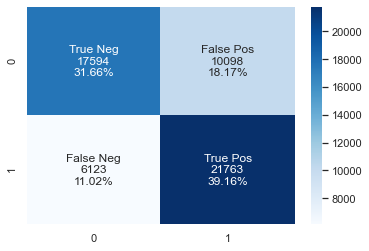

In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

#### Classification Report

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68     27692
           1       0.68      0.78      0.73     27886

    accuracy                           0.71     55578
   macro avg       0.71      0.71      0.71     55578
weighted avg       0.71      0.71      0.71     55578



#### ROC Curve

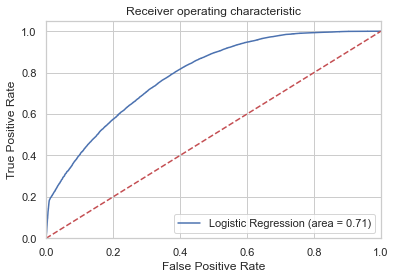

In [160]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

.90-1 = excellent (A)
.80-.90 = good (B)
.70-.80 = fair (C)
.60-.70 = poor (D)
.50-.60 = fail (F)

## Discussion: <a name="discussion"></a>

Though the regression accuracy measures are not very good, we still can try to conclude from the variables coefficients  which factors effect accidents severity more and how.<br>
Because all the variables are all standardized the coefficients are a good measure of the variable effect.<br><br>
So where should authorities focus their efforts in order to decrease accidents severity:
*	It comes with no surprise that what effects accidents severity the most is when pedestrians and bicycles are involved. Authorities should probably invest more efforts finding solutions for keeping them safe (perhaps more bicycle roads and lowering speeding limits within populated areas).
*	Moderate effect on severity rate can be achieved by decreasing speeding and driving under influence. 
*	Other variables either shows small effect or behind the control of state authorities in my opinion.


## Conclusions: <a name="conclusions"></a>
Unfortunately this project didn't deliver the best results measure wise, so it's problematic to try and draw any hard conclusions.<br>
More data on the drivers (like age, gender, driving experience, driving record) and on the vehicles (like safety rate and safety features) could have help us to build a better model.<br>
Having said that, judging by this model results, state authorities should focus their efforts on keeping pedestrians and cyclists safe if they want to decrease their accidents severity rate.<br>
Though the geographic clustering didn't produce much effect on the severity rate, I think it will be worth the while to create a more comprehensive geographic model to try to understand what factors effect accidents severity rate the most on each area.
